### Import libraries

In [1]:
# The YOLO object is created using the detect.pt model
from ultralytics import YOLO

# for drawing borders and sign names
from utils.plots import Annotator, colors

# for clear predictions
from IPython.display import clear_output

# for showing image
import plotly.express as px

# processing images
import cv2

### Read models

In [2]:
# detection model
model = YOLO("models/detect.pt")

# classification models
modelc = [YOLO("models/class0.pt"),
          YOLO("models/class1.pt"),
          YOLO("models/class2.pt"),
          YOLO("models/class3.pt")]

In [3]:
print('Class names of detection model')
print(model.names)

Class names of detection model
{0: 'prohibitory', 1: 'danger', 2: 'mandatory', 3: 'other'}


In [4]:
print('Class names of first classification model')
print(modelc[0].names)
print('\nClass names of second classification model')
print(modelc[1].names)
print('\nClass names of thirth classification model')
print(modelc[2].names)
print('\nClass names of fourth classification model')
print(modelc[3].names)

Class names of first classification model
{0: 'no overtaking', 1: 'prohibitory', 2: 'speed limit 100', 3: 'speed limit 30', 4: 'speed limit 50', 5: 'speed limit 60', 6: 'speed limit 70', 7: 'speed limit 80', 8: 'truck prohibited'}

Class names of second classification model
{0: 'children', 1: 'crossroads', 2: 'curve left', 3: 'curve right', 4: 'double curve', 5: 'junction', 6: 'other danger', 7: 'pedestrian', 8: 'road bump', 9: 'road work', 10: 'slippery road', 11: 'traffic light'}

Class names of thirth classification model
{0: 'forward or left', 1: 'forward or right', 2: 'go straight', 3: 'keep left', 4: 'keep right', 5: 'roundabout', 6: 'turn left', 7: 'turn right'}

Class names of fourth classification model
{0: 'main road', 1: 'max speed', 2: 'no entry', 3: 'stop', 4: 'yield'}


### Testing

In [5]:
img = cv2.imread('datasets/test/many.jpg')

# detect signs
results = model(img)

Ultralytics YOLOv8.0.40  Python-3.8.16 torch-1.7.1+cu110 CUDA:0 (NVIDIA GeForce MX130, 2048MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

0: 480x640 1 prohibitory, 8 dangers, 87.3ms
Speed: 1.2ms pre-process, 87.3ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
# columns: x1, y1, x2, y2, confidence, class
results[0].boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([9, 6])
dtype: torch.float32
 + tensor([[1.02800e+03, 3.72000e+02, 1.15900e+03, 5.02000e+02, 9.42495e-01, 0.00000e+00],
        [4.04000e+02, 4.78000e+02, 4.92000e+02, 5.65000e+02, 9.01227e-01, 1.00000e+00],
        [6.33000e+02, 4.87000e+02, 7.59000e+02, 6.01000e+02, 8.96206e-01, 1.00000e+00],
        [4.02000e+02, 3.85000e+02, 4.96000e+02, 4.78000e+02, 8.78565e-01, 1.00000e+00],
        [6.27000e+02, 3.74000e+02, 7.54000e+02, 4.88000e+02, 8.78380e-01, 1.00000e+00],
        [2.33000e+02, 3.93000e+02, 3.19000e+02, 4.70000e+02, 8.65244e-01, 1.00000e+00],
        [5.10000e+01, 4.65000e+02, 1.12000e+02, 5.19000e+02, 8.48354e-01, 1.00000e+00],
        [1.57000e+02, 4.28000e+02, 2.26000e+02, 4.91000e+02, 8.09733e-01, 1.00000e+00],
        [1.58000e+02, 4.90000e+02, 2.20000e+02, 5.50000e+02, 7.95315e-01, 1.00000e+00]], device='cuda:0')

In [7]:
# confidence
conf = 0.8


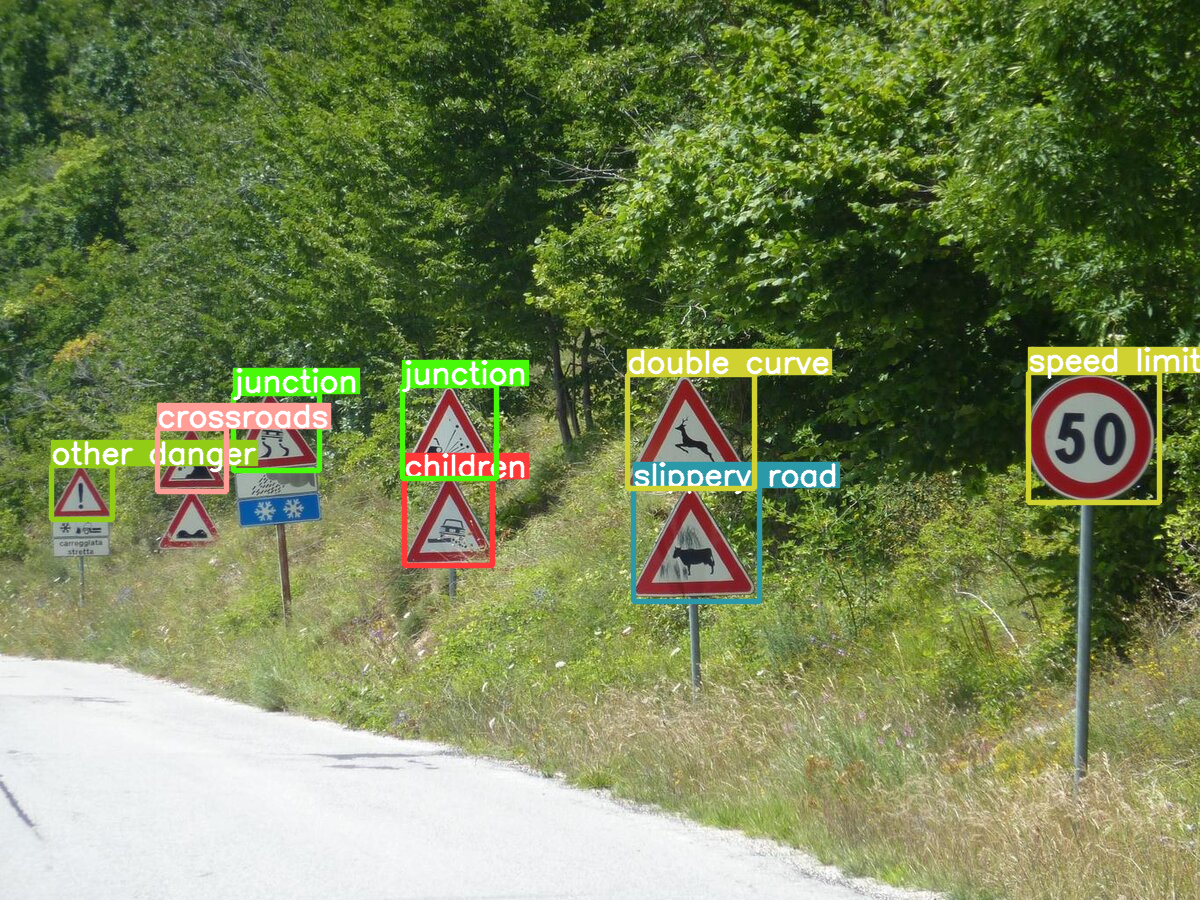

In [8]:
imgc = img.copy()

# these are the required values for the drawing borders
lw = max(round(sum(img.shape) / 2 * 0.003), 2)
tf = max(lw - 1, 1)


for box in results[0].boxes:
    if box.conf<conf:
        continue
        
    x1,y1,x2,y2 = box.xyxy[0]
    cls1 = int(box.cls)
    cls2_names = modelc[cls1].names
    
    # predict class
    cls2 = modelc[cls1](img[int(y1):int(y2), int(x1):int(x2)])[0].probs.argmax().item()
    
    # draw border
    annotator = Annotator(imgc, line_width=3, example=str(cls2_names))
    annotator.box_label((int(x1),int(y1),int(x2),int(y2)), cls2_names[cls2], color=colors(cls2, True))
    
clear_output()

fig = px.imshow(cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB),width=900, height=700)
fig.show()

### Test video file (optional) 

In [ ]:
cap = cv2.VideoCapture('file_name.mp4')

if (cap.isOpened()== False):
    print("Error opening video file")

while(cap.isOpened()):
    ret, img = cap.read()
    if ret==True:
        results = model(img.copy())
        
        imgc = img.copy()
        lw = max(round(sum(img.shape) / 2 * 0.003), 2)
        tf = max(lw - 1, 1)
        
        for box in results[0].boxes:
            if box.conf<conf:
                continue

            x1,y1,x2,y2 = box.xyxy[0]
            cls1 = int(box.cls)
            cls2_names = modelc[cls1].names
            cls2 = modelc[cls1](img[int(y1):int(y2), int(x1):int(x2)])[0].probs.argmax().item()
            annotator = Annotator(imgc, line_width=3, example=str(cls2_names))
            annotator.box_label((int(x1),int(y1),int(x2),int(y2)), cls2_names[cls2], color=colors(cls2, True))
        
        cv2.imshow('Frame', imgc)
          
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break

cap.release()
cv2.destroyAllWindows()